In [21]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import pandas as pd
import pickle

This real data example comes from the paper

Bayesian calibration of strength parameters using hydrocode simulations of symmetric impact shock experiments of Al-5083, Walters et al, J Applied Physics (2018)

First we will look at the design:

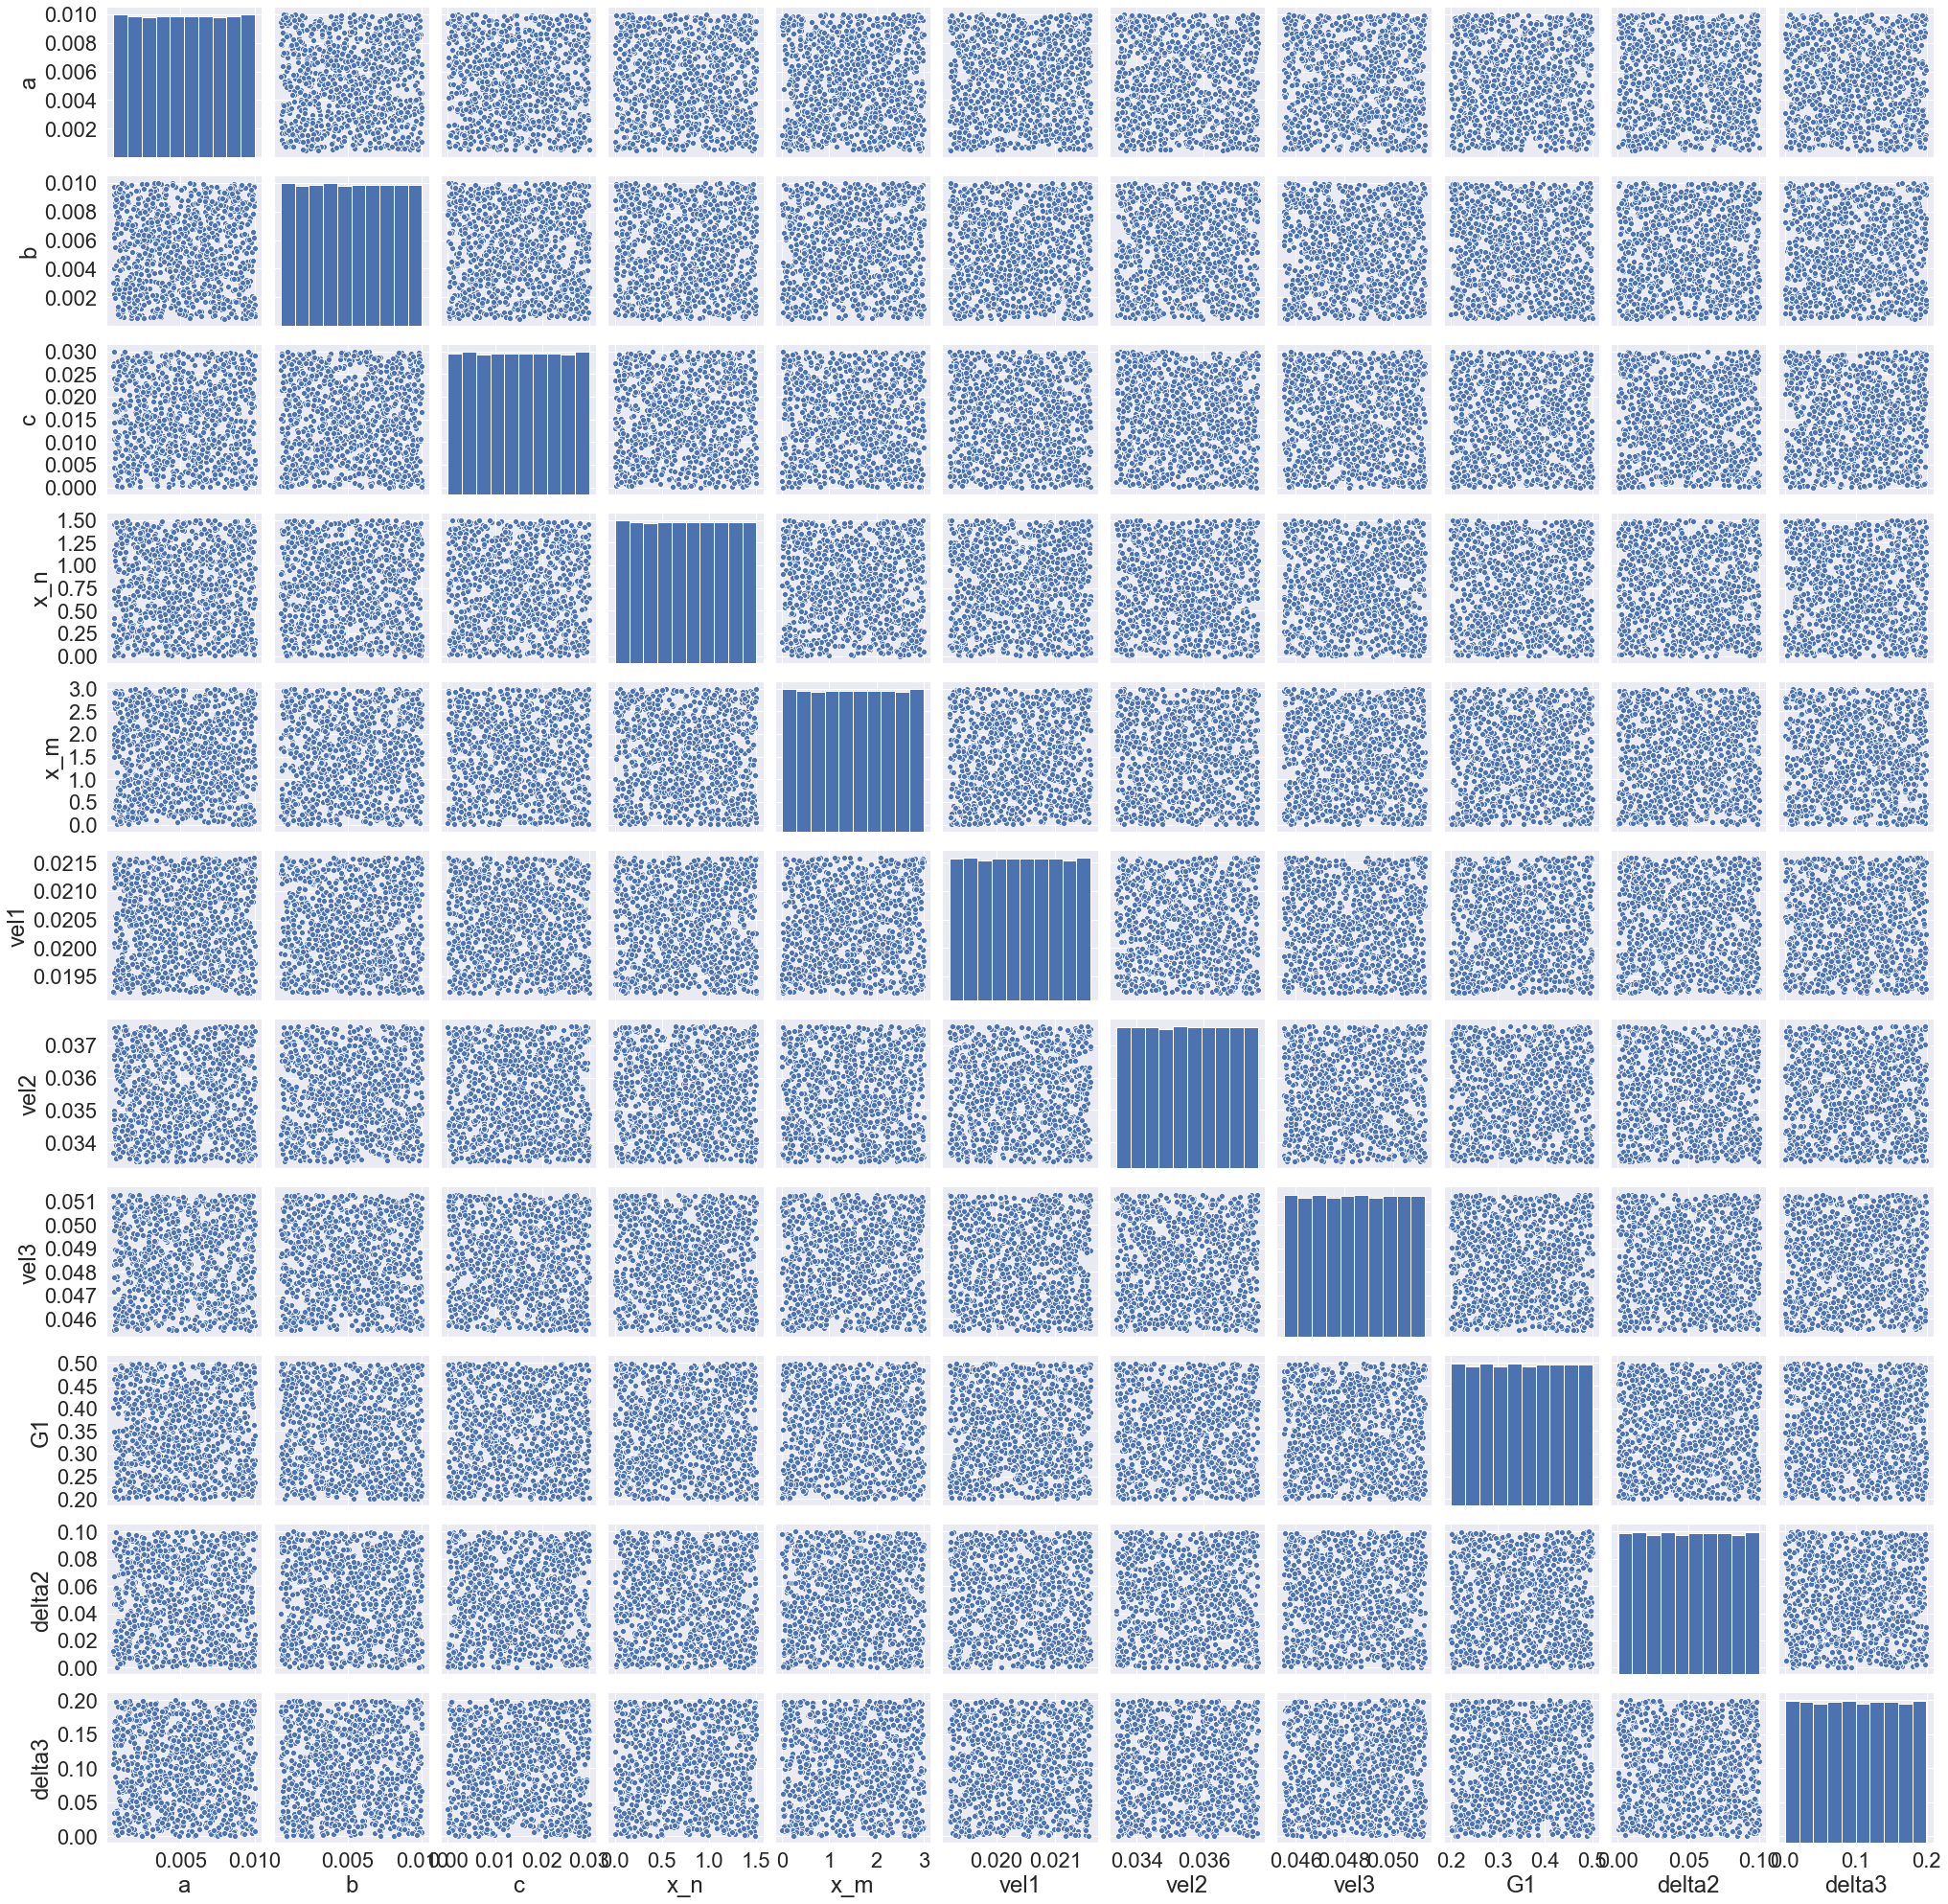

In [22]:
design = np.loadtxt('data/Al.trial5.design.txt', skiprows=1)
with open('data/Al.trial5.design.txt', 'r') as f:
    design_names = str.split(f.readline())

# Plot design
design_df = pd.DataFrame(data=design, columns=design_names)

with sns.plotting_context("notebook", font_scale=2.0):
    sns.pairplot(design_df)
plt.show()

We also look at the data, which consists of 12 features extracted from velocimetry curves.
The simulation features are shown as boxplots with the observed data features overlaid as green points.

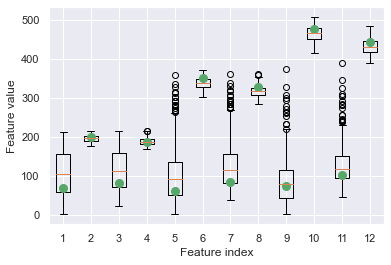

In [23]:
# Load raw data
sim_s104 = np.genfromtxt('data/features_cdf104S.csv', delimiter=',', skip_header=1)
sim_s105 = np.genfromtxt('data/features_cdf105S.csv', delimiter=',', skip_header=1)
sim_s106 = np.genfromtxt('data/features_cdf106S.csv', delimiter=',', skip_header=1)

obs_s104 = np.genfromtxt('data/features_cdf_obs104S.csv', delimiter=',', skip_header=1)
obs_s105 = np.genfromtxt('data/features_cdf_obs105S.csv', delimiter=',', skip_header=1)
obs_s106 = np.genfromtxt('data/features_cdf_obs106S.csv', delimiter=',', skip_header=1)

design = np.loadtxt('data/Al.trial5.design.txt', skiprows=1)
with open('data/Al.trial5.design.txt', 'r') as f:
    design_names = str.split(f.readline())

# Preprocess data
sel_features = [3, 5, 7, 9]
y_sim = 10000 * np.concatenate([sim_s104[:, sel_features], sim_s105[:, sel_features], sim_s106[:, sel_features]], axis=1)
y_obs = np.concatenate([obs_s104[sel_features], obs_s105[sel_features], obs_s106[sel_features]])[None, :]
n_features = y_obs.shape[1]
y_ind = np.arange(1, n_features+1)

# Plot data
plt.boxplot(y_sim)
plt.plot(y_ind, y_obs.T, 'go', markersize=8)
plt.ylabel('Feature value')
plt.xlabel('Feature index')
plt.show()

This example is rather slow to run, so we will load pre-saved samples instead of running in the notebook.
The code that was run to set up the model and do MCMC is in file `Al_5083_calibration.py`.


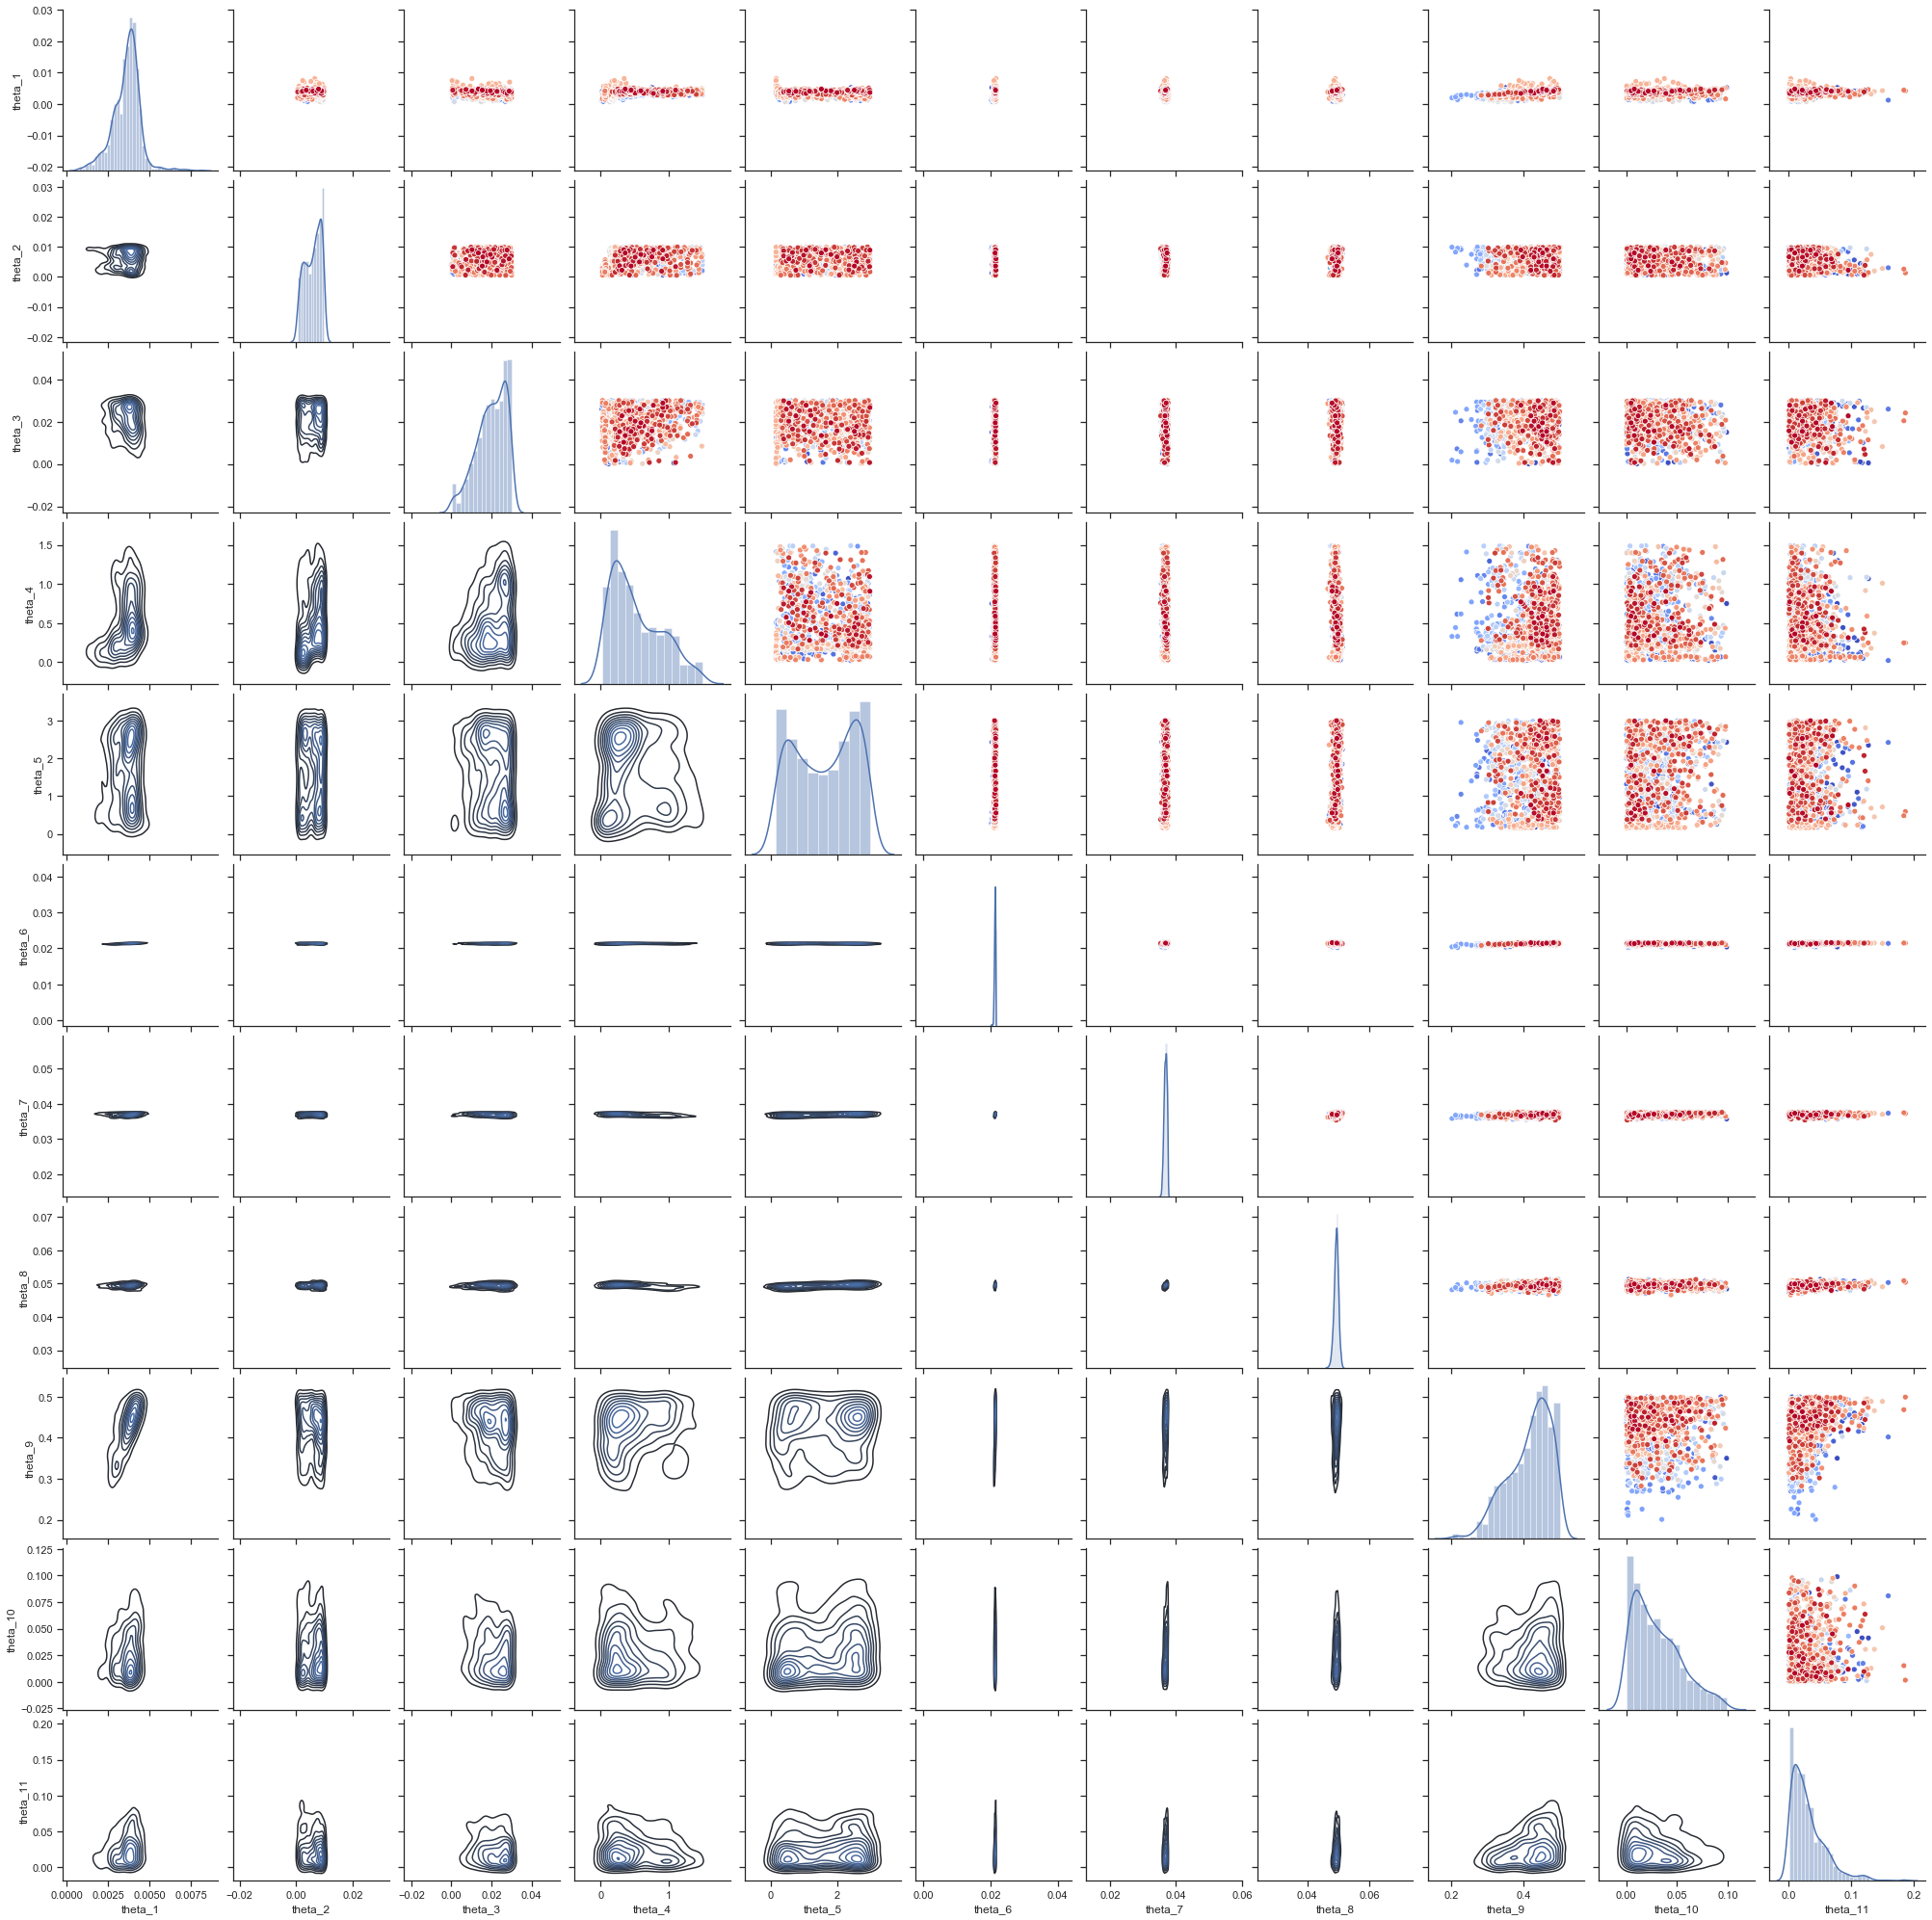

In [134]:
with open('data/sepia_mcmc_samples10000.pkl', 'rb') as f:
    samples = pickle.load(f)

# Pair plot of thetas
theta_df = pd.DataFrame(data=samples['theta'], columns=design_names)
SepiaPlot.theta_pairs(samples)

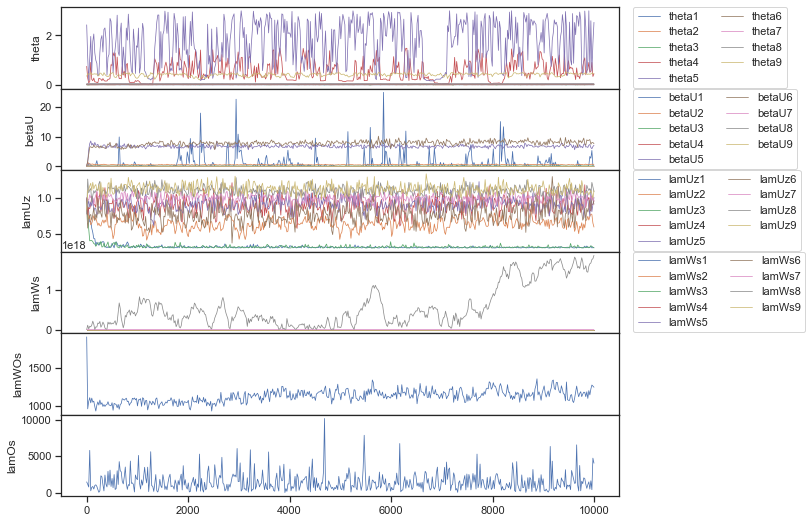

In [145]:
SepiaPlot.mcmc_trace(samples,max_print=9)